Импорт библиотек:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
df = pd.read_csv('ДатаСет_для_обработки_в_python.csv',encoding='cp1251')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

<b>Общий обзор данных по вкладам</b>

In [ ]:
df.shape

...

In [ ]:
df.columns

Типы данных:

In [ ]:
df.info()

In [6]:
df["Остаток"] = df["Остаток"].astype("float64")

In [7]:
df = df.fillna(np.NaN)

...

In [8]:
df_open = df[(df['Состояние'] == 'РАБОТАЕТ') & (df['Статус'] != 'депозиты для закрытия') 
             & (df['Статус'] != 'закрыт досрочно') & (df['Статус'] != 'закрыт по сроку')]

In [ ]:
df_open.shape

...

<b>Обзор всех открытых вкладов</b>

Клиенты, у которых больше одного вклада:

In [ ]:
df_open['Клиент'].value_counts().loc[lambda x: x>1]

...

Вклады по количеству:

In [ ]:
df_open['Вклад'].value_counts()

...

In [ ]:
df['Вклад'].value_counts(normalize=True)

Базовые описательные показатели для остатка:

In [ ]:
df['Остаток'].describe().apply(lambda x: '%.0f' % x)

...

Количество вкладов зарплатников:

In [ ]:
df_open['Зарплатники_Bool'].value_counts()

In [ ]:
df_open['Зарплатники_Bool'].value_counts(normalize=True)

...

Зарплатные клиенты следующих компаний:

In [ ]:
df_open['Зарплатники'].value_counts().head(10)

...

При этом с датой увольнения:

In [ ]:
df_open['Дата увольнения'].value_counts()

...

Количество клиентов с остатком средств и другие показатели:

In [ ]:
df1 = df_open[df_open['Остаток на счёте'] != 0]
df1['Остаток на счёте'].describe().apply(lambda x: '%.0f' % x)

...

Количество клиентов с ДБО работает:

In [ ]:
df_open['ДБО_Работает'].value_counts(normalize=True)

...

Были в приложении за месяц:

In [ ]:
df_open['Был_в_приложении_за_последний_месяц'].value_counts(normalize=True)

...

Какие вклады открыты у тех, кто был в приложении за месяц:

In [ ]:
df[df["Был_в_приложении_за_последний_месяц"] == 1]["Вклад"].value_counts()

...

Если есть остаток на счёте, заходят ли чаще в приложение клиенты с вкладами:

In [ ]:
df_open["money_left"] = (df_open["Остаток на счёте"] > 0).astype("int")
pd.crosstab(df_open["money_left"], df_open["Был_в_приложении_за_последний_месяц"], margins=True)

...

Месяц начала:

In [69]:
df['month_year'] = pd.to_datetime(df['Дата начала']).dt.to_period('M')

In [ ]:
plt.figure(figsize=(17,5))
plt.xticks(rotation=45)
sns.countplot(x="month_year", hue="Переоформление", data=df)

Распределение по переоформлениям:

In [ ]:
df["Переоформление"].value_counts()

...

<b>Анализ оттока</b>

Продлённые в марте договора:

In [26]:
start_date='3/1/2021'

In [27]:
end_date='3/31/2021'

In [28]:
mask_extended = (df['Дата начала']>start_date) & (df['Дата начала']<=end_date) & (df['Переоформление']==1)

In [29]:
df_extended = df.loc[mask_extended]

In [ ]:
df_extended.shape

Закрытые в марте договора:

In [31]:
start_date='3/1/2021'

In [32]:
end_date='3/31/2021'

In [33]:
mask_closed = (df['Дата закрытия']>start_date) & (df['Дата закрытия']<=end_date)

In [34]:
df_closed = df.loc[mask_closed]

In [ ]:
df_closed.shape

In [ ]:
df_concat = pd.concat([df_extended, df_closed])
df_concat.shape

...

Остаток на счете карты у переоформленных и нет:

In [ ]:
df_concat.groupby(['Переоформление'])['Остаток на счёте'].describe(percentiles=[])

...

В каких городах обслуживаются клиенты:

In [ ]:
df_concat.groupby(['Переоформление'])['Фил.'].value_counts()

КМ или ПМ:

In [ ]:
df_concat.groupby(['Переоформление'])['КМ_ПМ'].value_counts()

...

Зарплатники или нет:

In [ ]:
df_concat.groupby(['Переоформление'])['Зарплатники_Bool'].value_counts(normalize=True)

...

Сегмент заемщика:

In [ ]:
df_concat.groupby(['Переоформление'])['Сегмент заемщика'].value_counts(normalize=True)

...

Переоформления вкладов по названию вкладов:

In [ ]:
pd.crosstab(df_concat["Вклад"], df_concat["Переоформление"])

...

Средства на остатке у переоформленных клиентов:

In [ ]:
sns.boxplot(x="Остаток", data=df_extended)

...

<b>Матрица корреляций</b>

Рассмотрим матрицу корреляций, чтобы попытаться понять какие ещё параметры связаны между собой.

In [ ]:
df.corr()

Тоже самое, что и вверху в формате графика:

<AxesSubplot:>

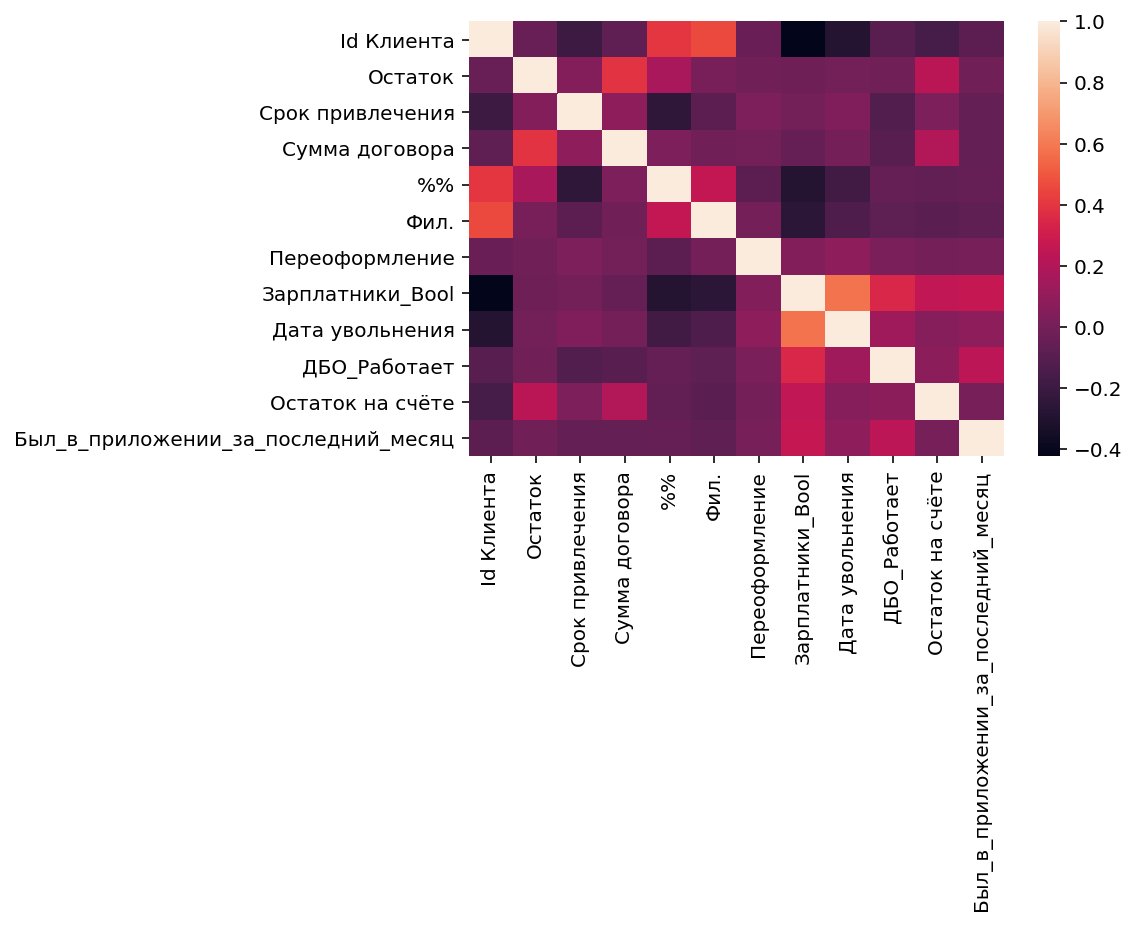

In [49]:
sns.heatmap(df.corr())

...